In [29]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [30]:
df = yf.download("TSLA", start="2020-01-01")
df = pd.DataFrame(df)
# Fix MultiIndex leftovers
df.columns = df.columns.droplevel(1)
df.columns.name = None
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


### SImple moving average

<Axes: xlabel='Date'>

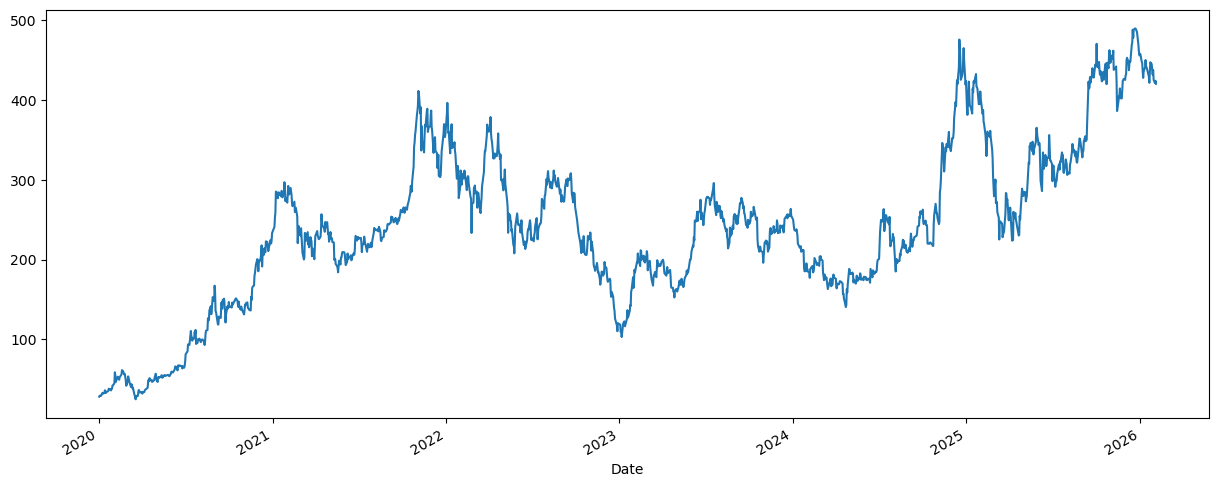

In [31]:
df['Open'].plot(figsize=(15,6))

In [33]:
df['Open: 10 days rolling'] = df['Open'].rolling(window=10, min_periods=1).mean()
df['Open: 20 days rolling'] = df['Open'].rolling(window=20, min_periods=1).mean()
df['Open: 30 days rolling'] = df['Open'].rolling(window=30, min_periods=1).mean()
df['Open: 50 days rolling'] = df['Open'].rolling(window=50, min_periods=1).mean()

In [34]:
df.head(20)

,Close,High,Low,Open,Volume,Open: 10 days rolling,Open: 20 days rolling,Open: 30 days rolling,Open: 50 days rolling
Date,,,,,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,28.299999,28.299999,28.299999,28.299999
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,28.833333,28.833333,28.833333,28.833333
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,29.010445,29.010445,29.010445,29.010445
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,29.447834,29.447834,29.447834,29.447834
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,29.874267,29.874267,29.874267,29.874267
2020-01-09,32.089333,33.253334,31.524668,33.139999,426606000,30.418556,30.418556,30.418556,30.418556
2020-01-10,31.876667,32.329334,31.580000,32.119331,194392500,30.661524,30.661524,30.661524,30.661524
2020-01-13,34.990665,35.042000,32.799999,32.900002,397764000,30.941333,30.941333,30.941333,30.941333
2020-01-14,35.861332,36.493999,34.993332,36.284000,434943000,31.534963,31.534963,31.534963,31.534963


<Axes: xlabel='Date'>

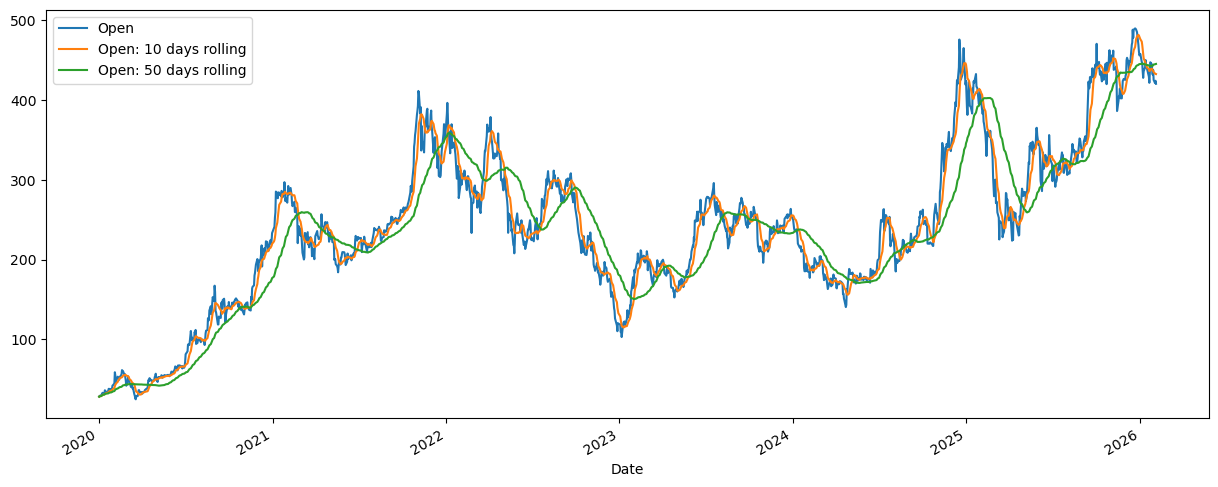

In [35]:
df[['Open', 'Open: 10 days rolling', 'Open: 50 days rolling']].plot(figsize=(15,6))

In [36]:
### disadvantage of SMA
# Giving importance to all the data based on window size
# Whereas the focus should be on the recent data

### Cummulative moving average

<Axes: xlabel='Date'>

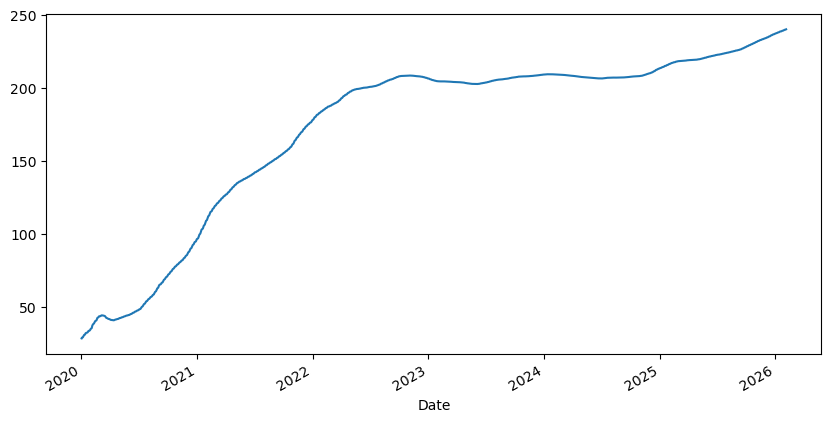

In [37]:
df['Open'].expanding().mean().plot(figsize=(10,5))

### Exponential moving average

In [38]:
# ((close_value - prev EMA)* multiplier) + prev EMA

df['EMA_0.1'] = df['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

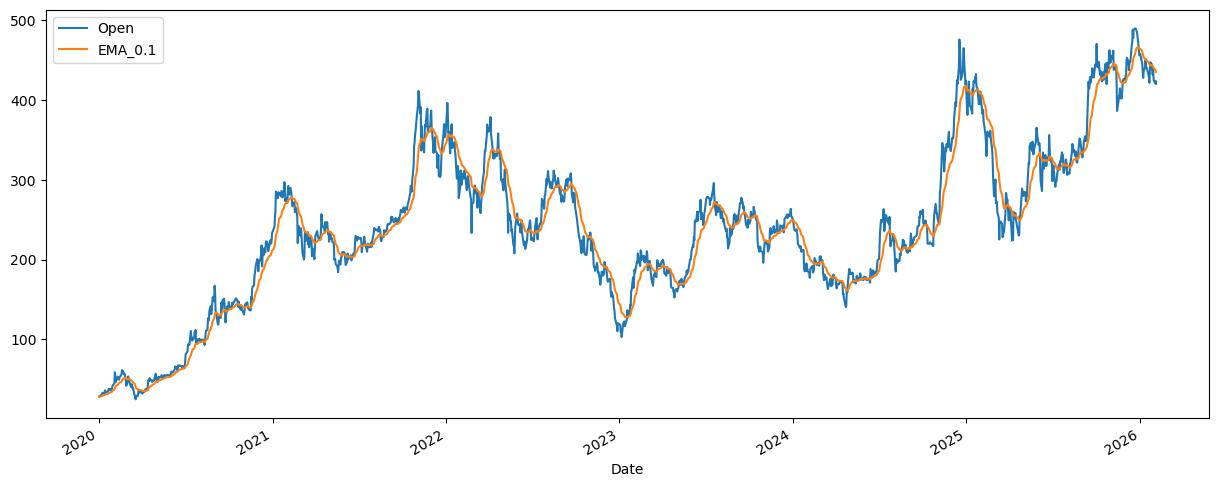

In [39]:
df[['Open', 'EMA_0.1']].plot(figsize=(15,6))

### Exponential weighted moving average

In [40]:
df['EMA_5days'] = df['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

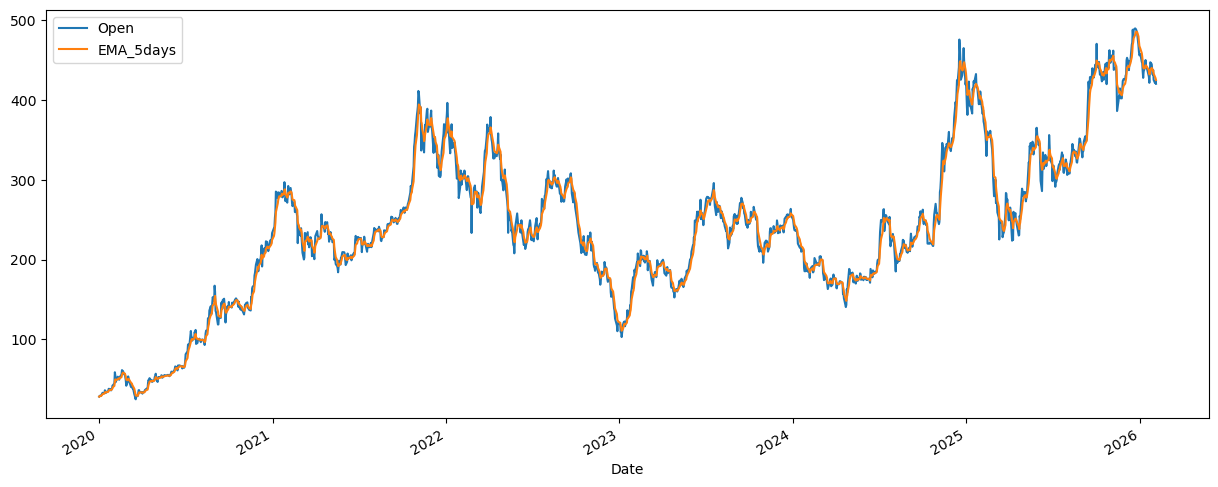

In [41]:
df[['Open', 'EMA_5days']].plot(figsize=(15,6))

We give weights to the previous values 
to prevent lags

Exponential weighted moving average is the best to use

### ARMA Auto Regression + Moving Average

Good for Forecasting of sales and montly 